## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [10]:
data = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [11]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
data.shape

(1460, 81)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [14]:
nulls = data.isnull().sum()
nulls = nulls[nulls>0]
nulls

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

1. Можно удалить PoolQC, MiscFeature и Alley, так как там почти все null.
2. Из всего про подвал оставим только общую площадь, BsmtCond и BsmtQual, то есть удаляем
BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
3. Столбец id

In [15]:
data = data.drop(['PoolQC', 'MiscFeature','Alley',
                 'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                 'BsmtFinSF2','BsmtUnfSF', 'Id'],
                 axis=1)

In [16]:
data.shape

(1460, 71)

✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [17]:
data.isnull().any().any()

True

In [18]:
nulls = data.isnull().sum()
nulls = nulls[nulls>0]
nulls_percent = nulls/len(data)
print("Количество пропусков в каждом столбце:")
print(nulls)
print("Доля от общего числа значений:")
print(nulls_percent)

Количество пропусков в каждом столбце:
LotFrontage      259
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64
Доля от общего числа значений:
LotFrontage     0.177397
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
Fence           0.807534
dtype: float64


✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение.

In [19]:
for col in data:
    if data[col].isnull().sum() > 0:
        print(col, ":", data[col].dtypes)

LotFrontage : float64
MasVnrType : object
MasVnrArea : float64
BsmtQual : object
BsmtCond : object
Electrical : object
FireplaceQu : object
GarageType : object
GarageYrBlt : float64
GarageFinish : object
GarageQual : object
GarageCond : object
Fence : object


Object: MasVnrType, BsmtQual, BsmtCond, FireplaceQu, GarageFinish, GarageQual, Fence

Заполним самым часто встречающимся элементом

In [20]:
cat_names = data.select_dtypes('object').columns

In [21]:
for column in cat_names:
    top_of_column = data[column].describe()["top"]
    data[column] = data[column].fillna(top_of_column)

Float: LotFrontage, MasVnrArea, GarageYrBltb
    
Заполним средним значением по столбцу

In [22]:
float_names = data.select_dtypes('float64').columns

In [23]:
for column in float_names:
    top_of_column = data[column].mean()
    data[column] = data[column].fillna(top_of_column)

✅ Проверьте, что вы действительно избавились от пропусков

In [24]:
data.isnull().any().any()

False

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [25]:
data_coded = data.copy()

In [26]:
label_columns = [] #признаки, которые будем кодировать label encoding
ohe_columns = [] #признаки, которые будем кодировать one hot encoding

In [27]:
for column in cat_names:
    if (data_coded[column].nunique() == 2):
        label_columns.append(column)
    else:
        ohe_columns.append(column)

In [28]:
for column in label_columns:
    data_coded[column] = LabelEncoder().fit_transform(data_coded[column])

In [29]:
data_coded = pd.get_dummies(data_coded, columns=ohe_columns, drop_first=True, dtype = int)

In [30]:
data_coded.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,0,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,0,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


In [74]:
data_corr = data.drop(labels=cat_names, axis=1)
data_corr = data_corr.corr()
data_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.238518,-0.251758,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.363358,0.414266,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.537808,0.476224,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.171098,-0.144203,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.362452,0.342160,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

<Axes: >

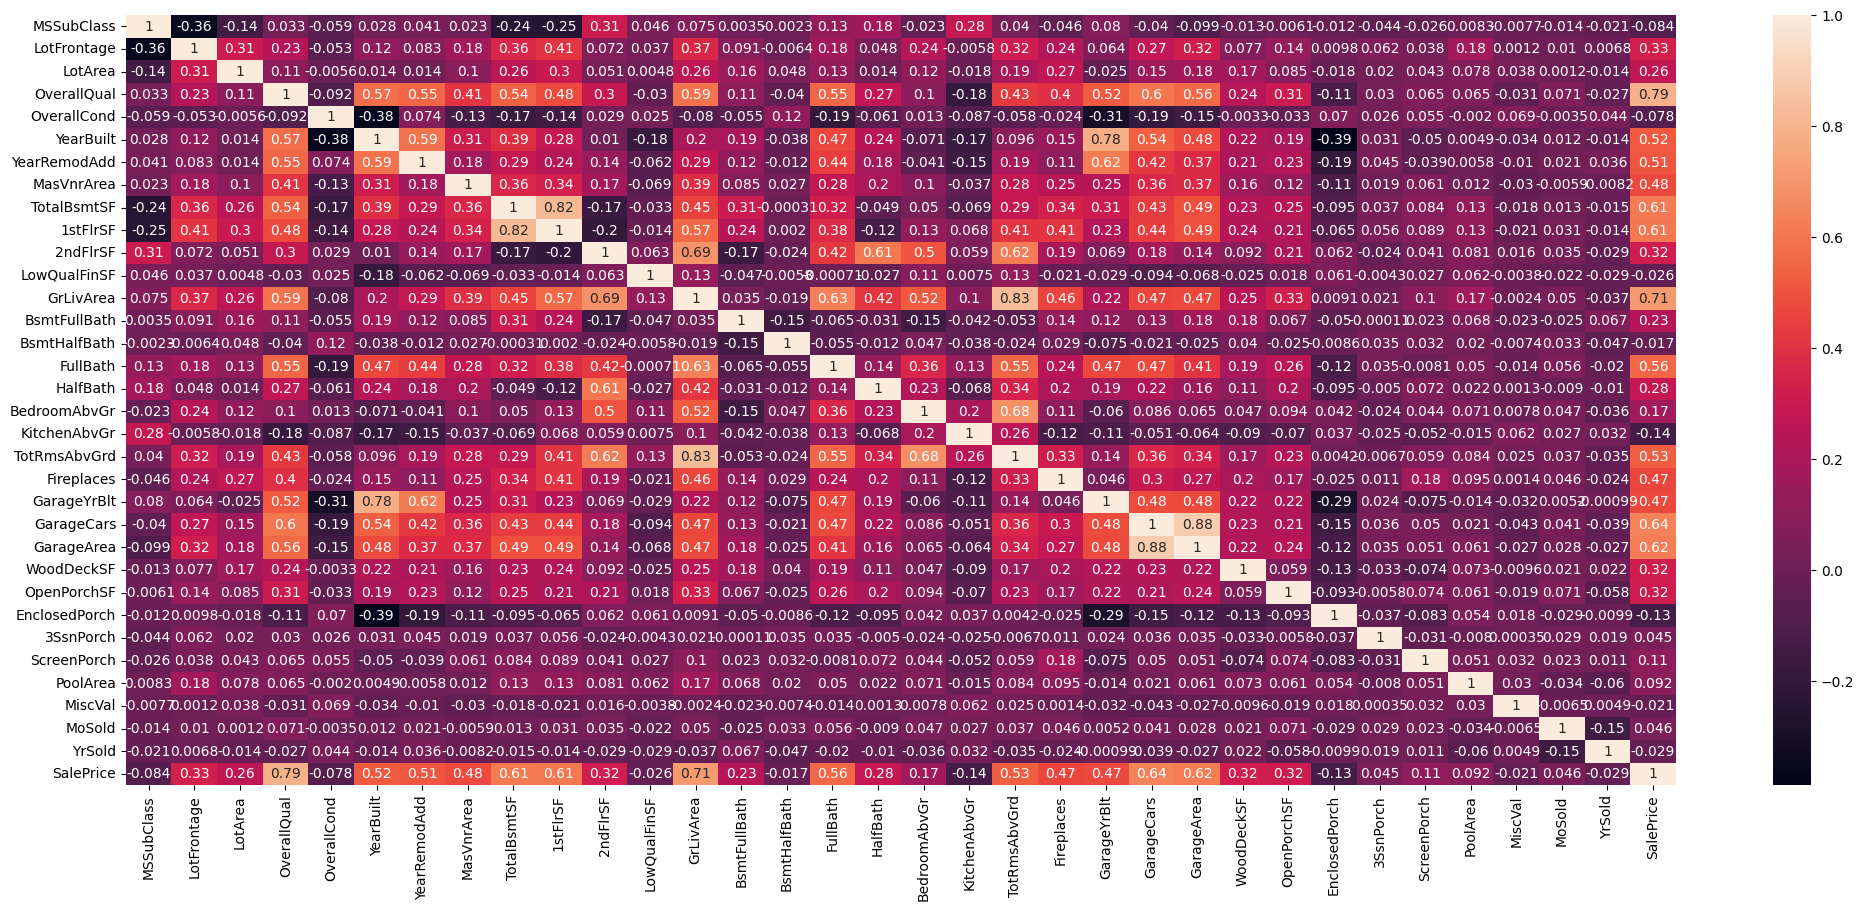

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(data_corr, linewidths = 0.001, annot=True)

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [33]:
data_corr = data_corr.abs()

sol = (data_corr.where(np.triu(np.ones(data_corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

features = []
corr = []

for index, value in sol.items():
    if(index[1] == 'SalePrice'):
        print(index[0],':', value)
        features.append(index[0])
        corr.append(value)

OverallQual : 0.7909816005838054
GrLivArea : 0.7086244776126518
GarageCars : 0.6404091972583521
GarageArea : 0.6234314389183621
TotalBsmtSF : 0.613580551559194
1stFlrSF : 0.6058521846919154
FullBath : 0.5606637627484453
TotRmsAbvGrd : 0.5337231555820283
YearBuilt : 0.5228973328794969
YearRemodAdd : 0.5071009671113867
MasVnrArea : 0.475241316773666
GarageYrBlt : 0.4701774537404816
Fireplaces : 0.46692883675152763
LotFrontage : 0.33490085154055127
WoodDeckSF : 0.32441344456812926
2ndFlrSF : 0.31933380283206736
OpenPorchSF : 0.31585622711605504
HalfBath : 0.2841076755947826
LotArea : 0.26384335387140495
BsmtFullBath : 0.22712223313149413
BedroomAbvGr : 0.1682131543007396
KitchenAbvGr : 0.1359073708421411
EnclosedPorch : 0.12857795792595655
ScreenPorch : 0.11144657114291114
PoolArea : 0.09240354949187321
MSSubClass : 0.08428413512659509
OverallCond : 0.07785589404867795
MoSold : 0.046432245223819474
3SsnPorch : 0.04458366533574842
YrSold : 0.028922585168736886
LowQualFinSF : 0.025606130000

In [34]:
data_coef_corr = pd.DataFrame(corr, index = features, columns = ['SalePrice'])

In [35]:
data_coef_corr

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


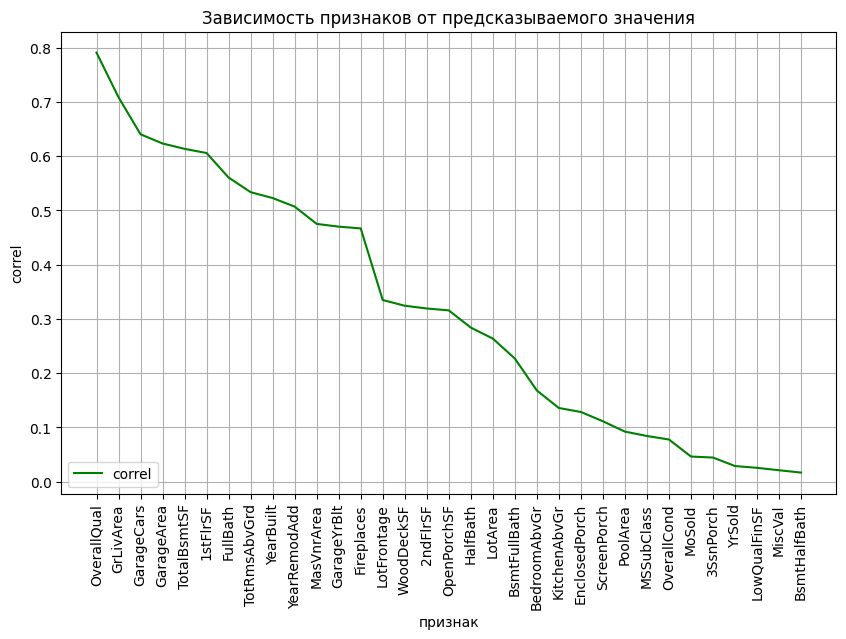

In [36]:
y1 = corr
fig, ax = plt.subplots(figsize = (10,6))

x = features

ax.plot(x, y1, color='green', label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('correl')
plt.title('Зависимость признаков от предсказываемого значения')

leg = ax.legend(loc='lower left', frameon=True)

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

In [37]:
X = data_coded.drop('SalePrice', axis=1)
y = data['SalePrice']

Text(0, 0.5, 'Counts')

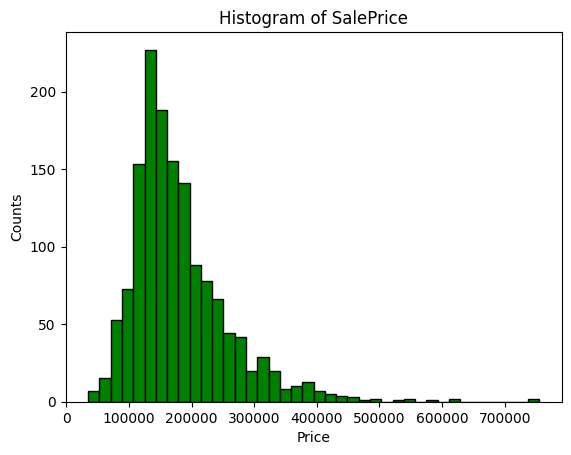

In [38]:
plt.hist(data['SalePrice'], color = 'green', edgecolor = 'black',
         bins = int(200/5))

plt.title('Histogram of SalePrice')
plt.xlabel('Price')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

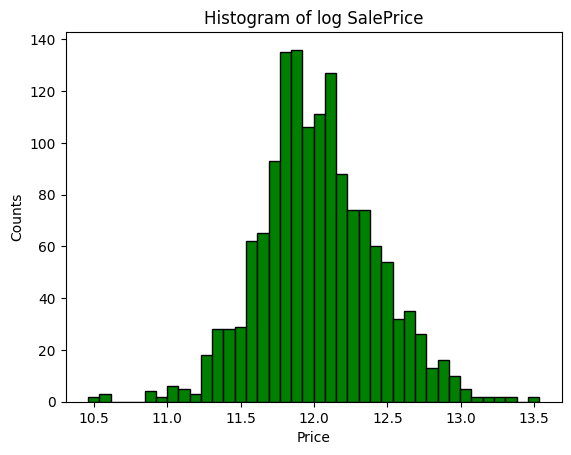

In [39]:
plt.hist(np.log1p(data['SalePrice']), color = 'green', edgecolor = 'black',
         bins = int(200/5))

plt.title('Histogram of log SalePrice')
plt.xlabel('Price')
plt.ylabel('Counts')

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [40]:
np.random.seed(13)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log1p(y), test_size = 0.25)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

**Линейная регрессия**

In [42]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [43]:
print("lin_reg MSE train: ", mean_squared_error(math.e**(y_train)-1, math.e**(lin_regr.predict(X_train))-1))
print("lin_reg MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(lin_regr.predict(X_test))-1))

lin_reg MSE train:  251865911.82867834
lin_reg MSE test:  15580835442.856325


In [44]:
print("lin_reg MAE train: ", mean_absolute_error(math.e**(y_train)-1, math.e**(lin_regr.predict(X_train))-1))
print("lin_reg MAE test: ", mean_absolute_error(math.e**(y_test)-1, math.e**(lin_regr.predict(X_test))-1))

lin_reg MAE train:  11026.565645498817
lin_reg MAE test:  24771.66550144401


In [45]:
print("lin_reg r2_score train: ", r2_score(math.e**(y_train)-1, math.e**(lin_regr.predict(X_train))-1))
print("lin_reg r2_score test: ",r2_score(math.e**(y_test)-1, math.e**(lin_regr.predict(X_test))-1))

lin_reg r2_score train:  0.9593548287574657
lin_reg r2_score test:  -1.353182740587752


In [46]:
coef_lin_reg = pd.DataFrame(lin_regr.coef_, index = X.columns, columns=['coef'])
coef_lin_reg.sort_values(by=['coef'])

,coef
Exterior1st_BrkComm,-0.425206
SaleCondition_Partial,-0.300955
Utilities,-0.231403
Electrical_Mix,-0.213621
Functional_Maj2,-0.197558
...,...
MSZoning_RM,0.301698
MSZoning_RL,0.337181
MSZoning_FV,0.348714
BsmtCond_Po,0.369657


**Lasso**

In [47]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [48]:
print("lasso MSE train: ", mean_squared_error(math.e**(y_train)-1, math.e**(lasso.predict(X_train))-1))
print("lasso MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(lasso.predict(X_test))-1))

lasso MSE train:  362050642.7247
lasso MSE test:  22640764676.218636


In [49]:
print("lasso MAE train: ", mean_absolute_error(math.e**(y_train)-1, math.e**(lasso.predict(X_train))-1))
print("lasso MAE test: ", mean_absolute_error(math.e**(y_test)-1, math.e**(lasso.predict(X_test))-1))

lasso MAE train:  13142.649736068686
lasso MAE test:  25762.0858059185


In [50]:
print("lasso r2_score train: ", r2_score(math.e**(y_train)-1, math.e**(lasso.predict(X_train))-1))
print("lasso r2_score test: ",r2_score(math.e**(y_test)-1, math.e**(lasso.predict(X_test))-1))

lasso r2_score train:  0.9415736323142263
lasso r2_score test:  -2.4194480049023275


In [51]:
coef_lasso = pd.DataFrame(lasso.coef_, index = X.columns, columns=['coef_lasso']).sort_values(by=["coef_lasso"])

In [52]:
coef_lasso

,coef_lasso
BsmtQual_Gd,-0.021426
HouseStyle_1Story,-0.020448
BldgType_Twnhs,-0.020411
Neighborhood_NWAmes,-0.017435
Neighborhood_Edwards,-0.014777
...,...
MSZoning_RL,0.059197
BsmtFullBath,0.059997
SaleCondition_Normal,0.066242
Neighborhood_Crawfor,0.106379


**Ridge**

In [53]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [54]:
print("ridge MSE train: ", mean_squared_error(math.e**(y_train)-1, math.e**(ridge.predict(X_train))-1))
print("ridge MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(ridge.predict(X_test))-1))

ridge MSE train:  252365260.646085
ridge MSE test:  15611052319.20652


In [55]:
print("ridge MAE train: ", mean_absolute_error(math.e**(y_train)-1, math.e**(ridge.predict(X_train))-1))
print("ridge MAE test: ", mean_absolute_error(math.e**(y_test)-1, math.e**(ridge.predict(X_test))-1))

ridge MAE train:  11089.475130553546
ridge MAE test:  24649.43469558195


In [56]:
print("ridge r2_score train: ", r2_score(math.e**(y_train)-1, math.e**(ridge.predict(X_train))-1))
print("ridge r2_score test: ",r2_score(math.e**(y_test)-1, math.e**(ridge.predict(X_test))-1))

ridge r2_score train:  0.9592742457280041
ridge r2_score test:  -1.3577464131945605


In [57]:
coef_ridge = pd.DataFrame(ridge.coef_, index = X.columns, columns=["coef_ridge"]).sort_values(by=["coef_ridge"])

In [58]:
coef_ridge

,coef_ridge
Exterior1st_BrkComm,-0.361938
SaleCondition_Partial,-0.232623
Utilities,-0.200545
Functional_Maj2,-0.193293
LandSlope_Sev,-0.185014
...,...
MSZoning_RM,0.261470
MSZoning_RL,0.295039
BsmtCond_Po,0.298513
MSZoning_FV,0.303370


**CV**

In [59]:
alphas = [0.00001, 0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.5, 1, 2, 6]
lasso_euclid = []
ridge_euclid = []
print('Евклидовы нормы весов Lasso')
for i in range(len(alphas)):
    lasso = linear_model.Lasso(alpha = alphas[i])
    lasso.fit(X_train, y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
print(lasso_euclid)

print('--------------------')

print('Евклидовы нормы весов Ridge')
for i in range(len(alphas)):
    ridge = linear_model.Ridge(alpha = alphas[i])
    ridge.fit(X_train, y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
print(ridge_euclid)

Евклидовы нормы весов Lasso
[1.341095436293723, 0.7401668433615187, 0.39996523899713177, 0.3090166338379325, 0.23809352188849786, 0.07688030519855378, 0.003202081193768162, 0.002293326410817482, 0.0011145025478250922, 0.0006229503428644619]
--------------------
Евклидовы нормы весов Ridge
[1.4874668949206398, 1.4871520994484633, 1.4864537902031836, 1.4857571789622166, 1.484023022797601, 1.4544725552699649, 0.9126861824820826, 0.7442523686494302, 0.5929711911219518, 0.4049822706156963]


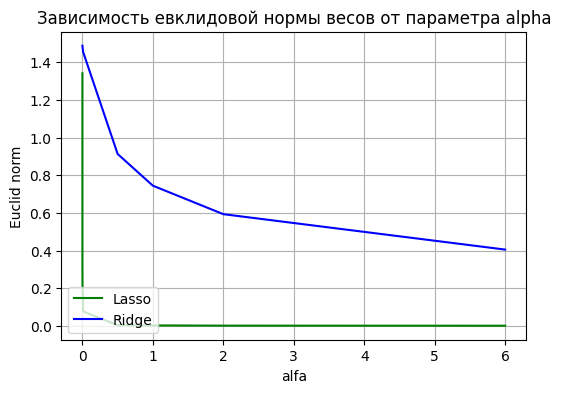

In [60]:
x = alphas
fig, ax = plt.subplots(figsize = (6,4))

y1 = lasso_euclid
y2 = ridge_euclid

ax.plot(x, y1, color='green', label='Lasso')
ax.plot(x, y2, color='blue', label='Ridge')

ax.grid(True)
plt.xlabel('alfa')
plt.ylabel('Euclid norm')
plt.title('Зависимость евклидовой нормы весов от параметра alpha')


leg = ax.legend(loc='lower left', frameon=True)

**Подберем альфы для Lasso и Ridge**

In [61]:
reg = LassoCV(cv=5, alphas = [0.00001, 0.0001,0.0003, 0.0005, 0.001, 0.01, 0.5, 1, 2, 6], random_state=0).fit(X_train, y_train)
best_lasso = reg.alpha_
print("Лучший параметр альфа для Lasso: ", best_lasso)

Лучший параметр альфа для Lasso:  0.0005


In [62]:
lasso_cv = linear_model.Lasso(alpha=best_lasso)
lasso_cv.fit(X_train, y_train)
print('lasso cv MSE train',  mean_squared_error(math.e**(y_train)-1, math.e**(lasso_cv.predict(X_train))-1))
print("lasso cv MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(lasso_cv.predict(X_test))-1))

lasso cv MSE train 323077545.94242495
lasso cv MSE test:  20690206013.73317


In [63]:
coef_lasso_cv = pd.DataFrame(lasso_cv.coef_, index = X.columns, columns=['coef_lasso']).sort_values(by=["coef_lasso"])

In [64]:
reg = RidgeCV(cv=5, alphas = [1, 2, 5, 10, 20, 30]).fit(X_train, y_train)
best_ridge = reg.alpha_
print("Лучший параметр альфа для Ridge: ", best_ridge) 

Лучший параметр альфа для Ridge:  10


In [65]:
ridge_cv = linear_model.Ridge(alpha=best_ridge)
ridge_cv.fit(X_train, y_train)
print('ridge cv MSE train',  mean_squared_error(math.e**(y_train)-1, math.e**(ridge_cv.predict(X_train))-1))
print("ridge cv MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(ridge_cv.predict(X_test))-1))

ridge cv MSE train 302771281.4957902
ridge cv MSE test:  18727029875.396805


In [66]:
coef_ridge_cv = pd.DataFrame(ridge_cv.coef_, index = X.columns, columns=["coef_ridge"]).sort_values(by=["coef_ridge"])

In [67]:
coef_ridge_cv

,coef_ridge
Neighborhood_MeadowV,-0.057013
LandSlope_Sev,-0.047002
Functional_Maj2,-0.042589
Neighborhood_Edwards,-0.040591
KitchenQual_Fa,-0.040302
...,...
BsmtFullBath,0.064935
Functional_Typ,0.068098
SaleCondition_Normal,0.073593
Neighborhood_StoneBr,0.074066


✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

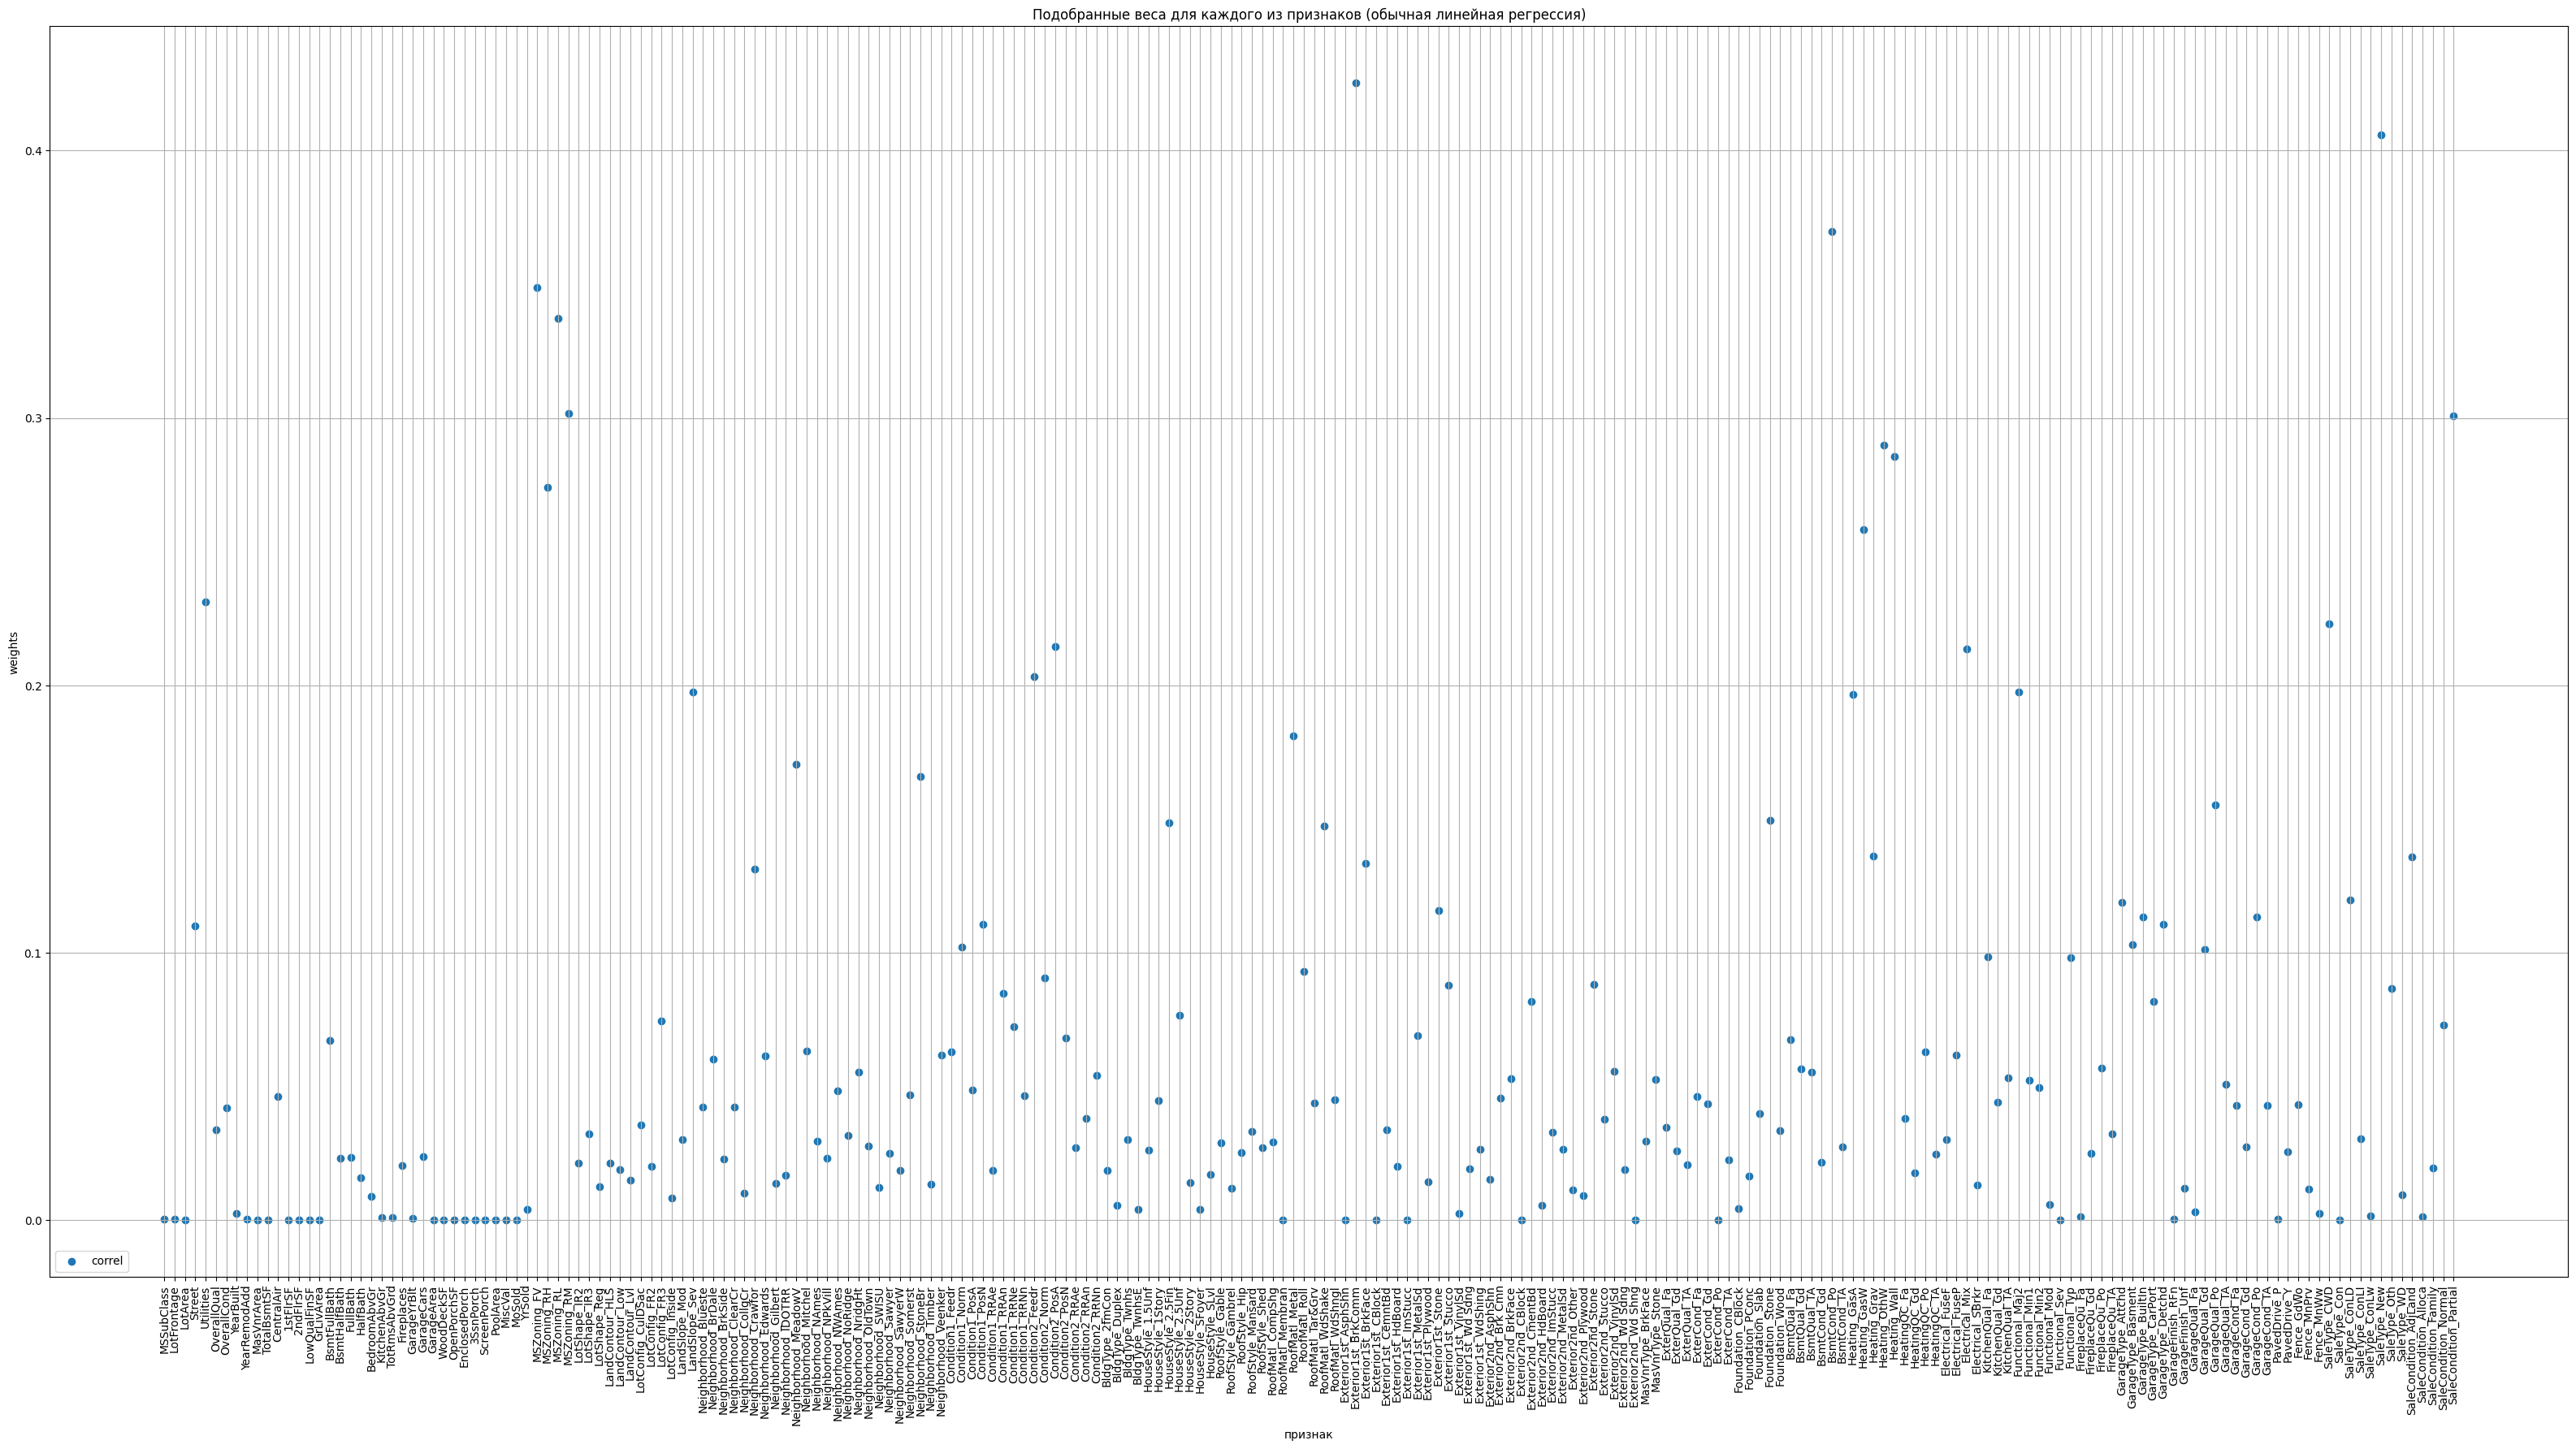

In [68]:
y1 = coef_lin_reg['coef'].abs()
fig, ax = plt.subplots(figsize = (40,20))

x = X.columns

ax.scatter(x, y1, label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('weights')
plt.title('Подобранные веса для каждого из признаков (обычная линейная регрессия)')

leg = ax.legend(loc='lower left', frameon=True)

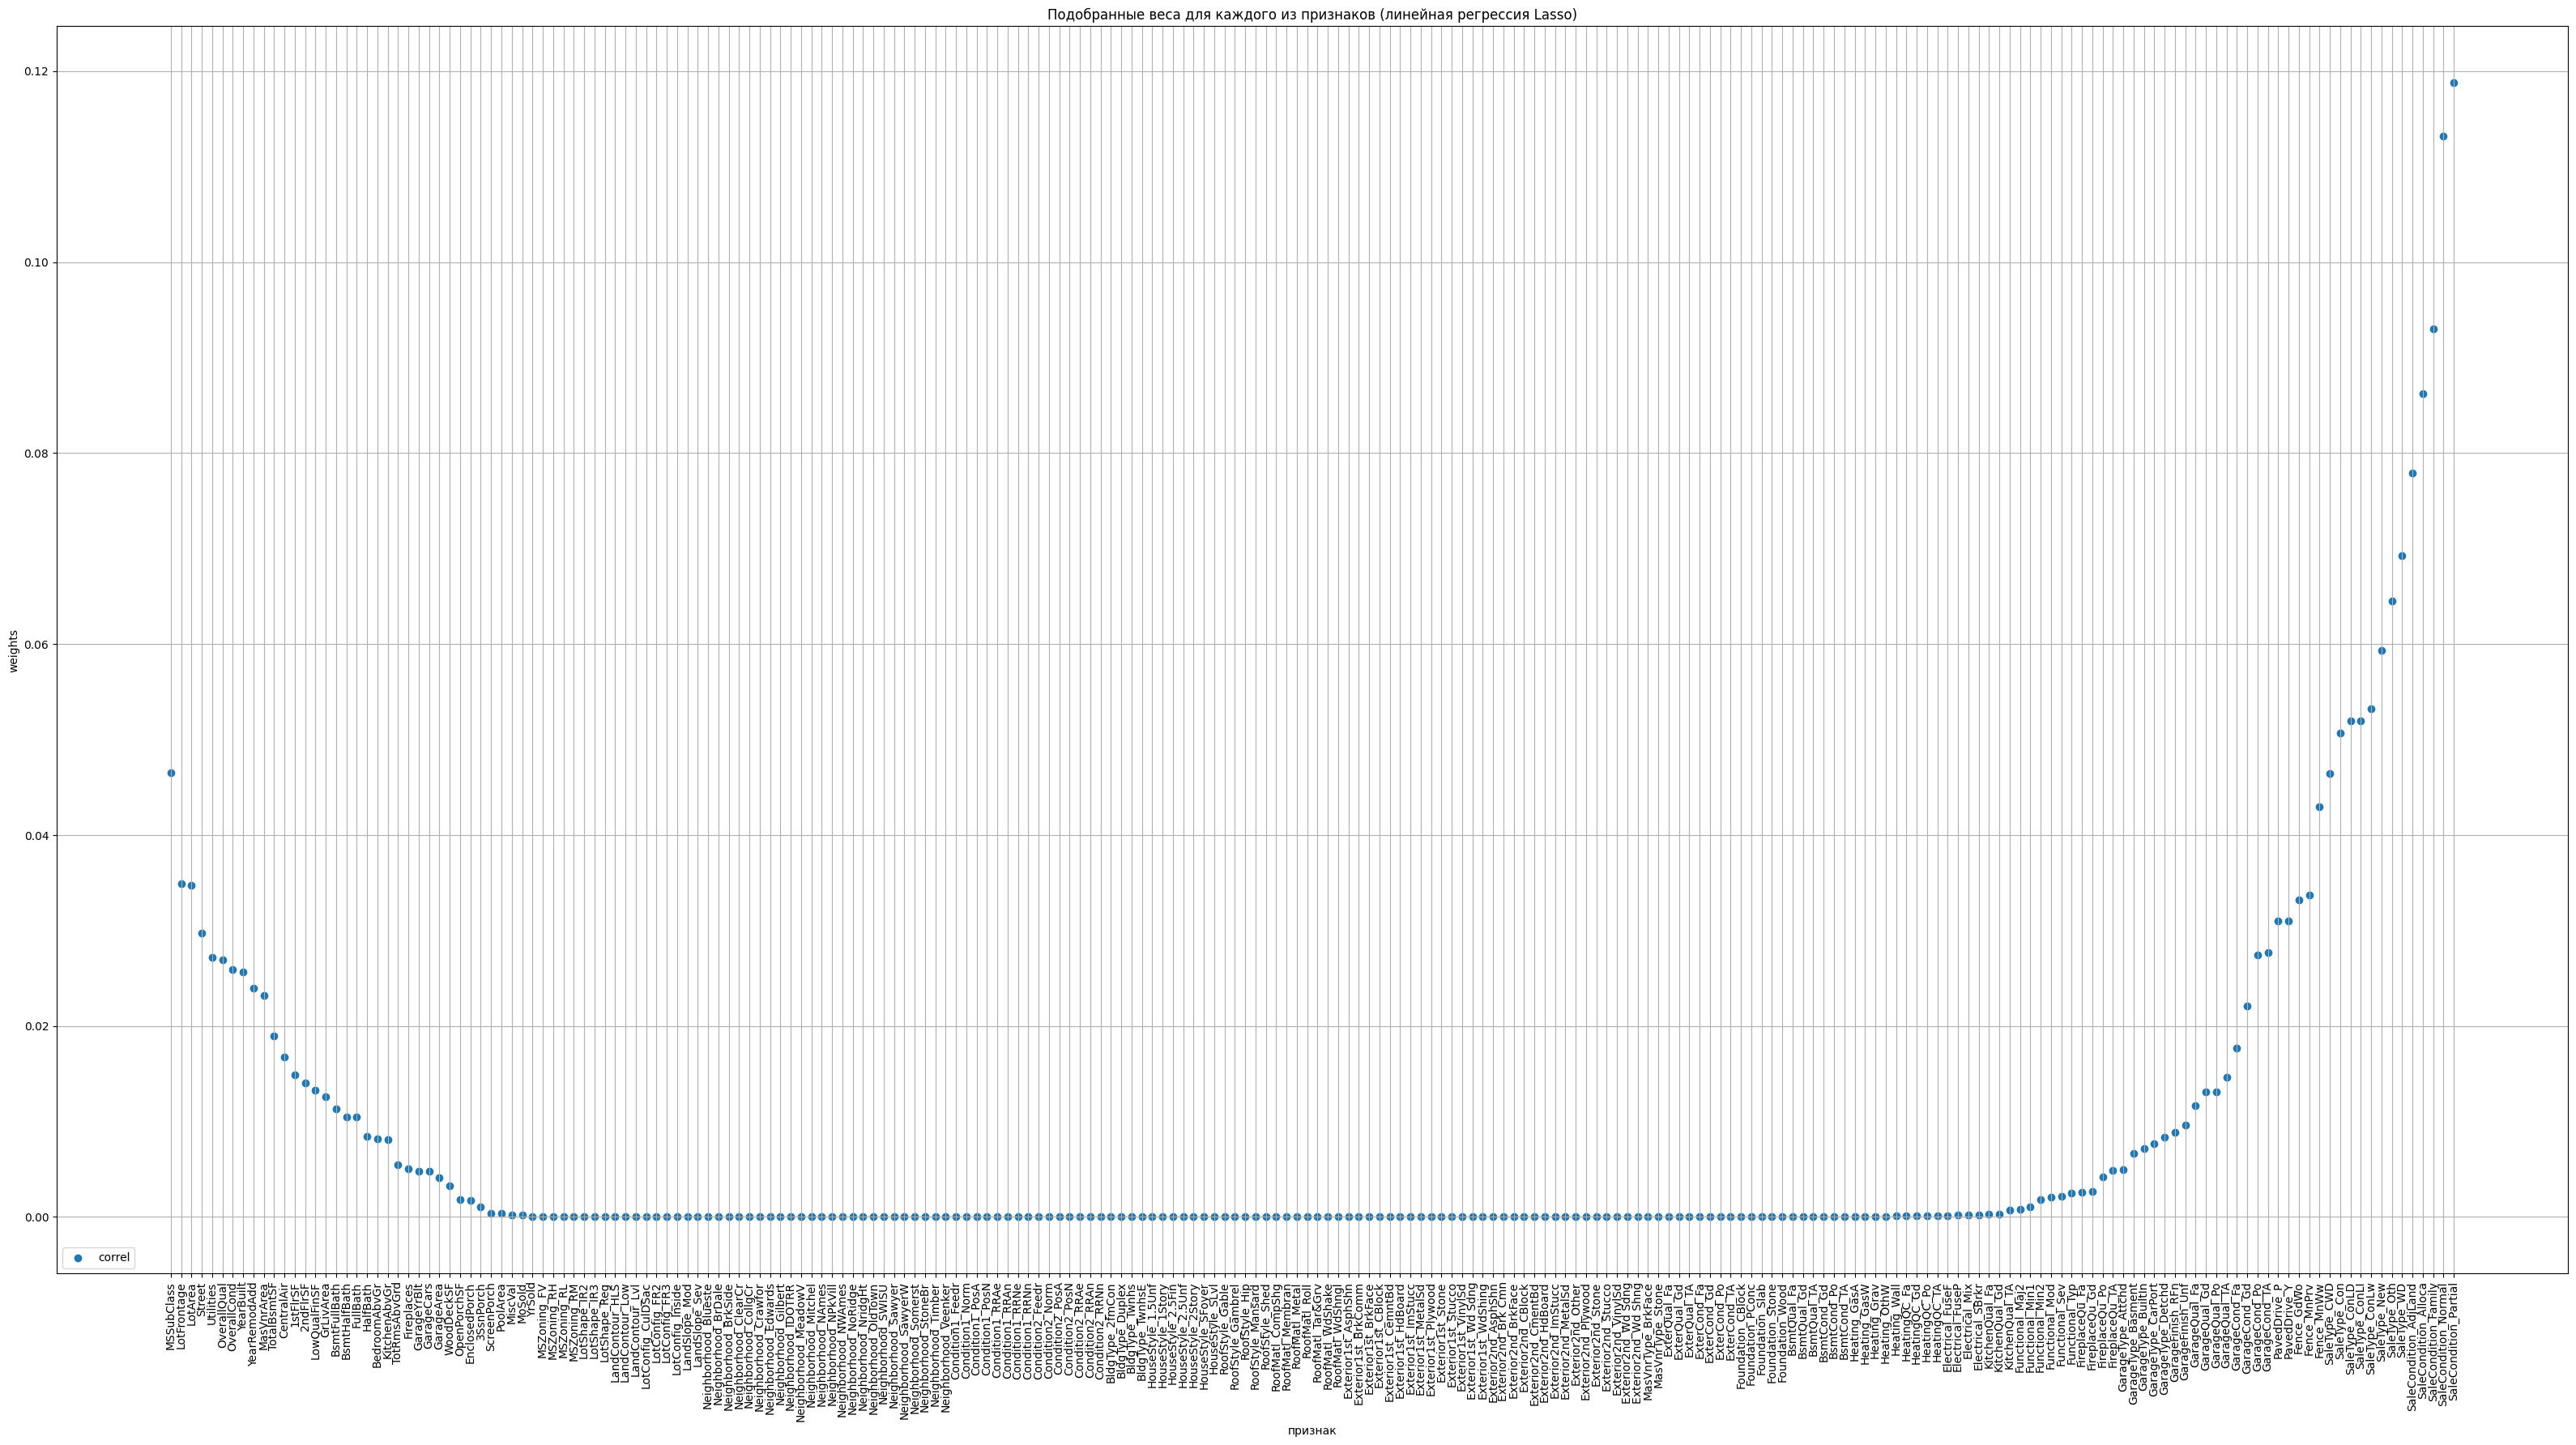

In [69]:
y1 = coef_lasso_cv['coef_lasso'].abs()
fig, ax = plt.subplots(figsize = (40,20))

x = X.columns

ax.scatter(x, y1, label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('weights')
plt.title('Подобранные веса для каждого из признаков (линейная регрессия Lasso)')

leg = ax.legend(loc='lower left', frameon=True)

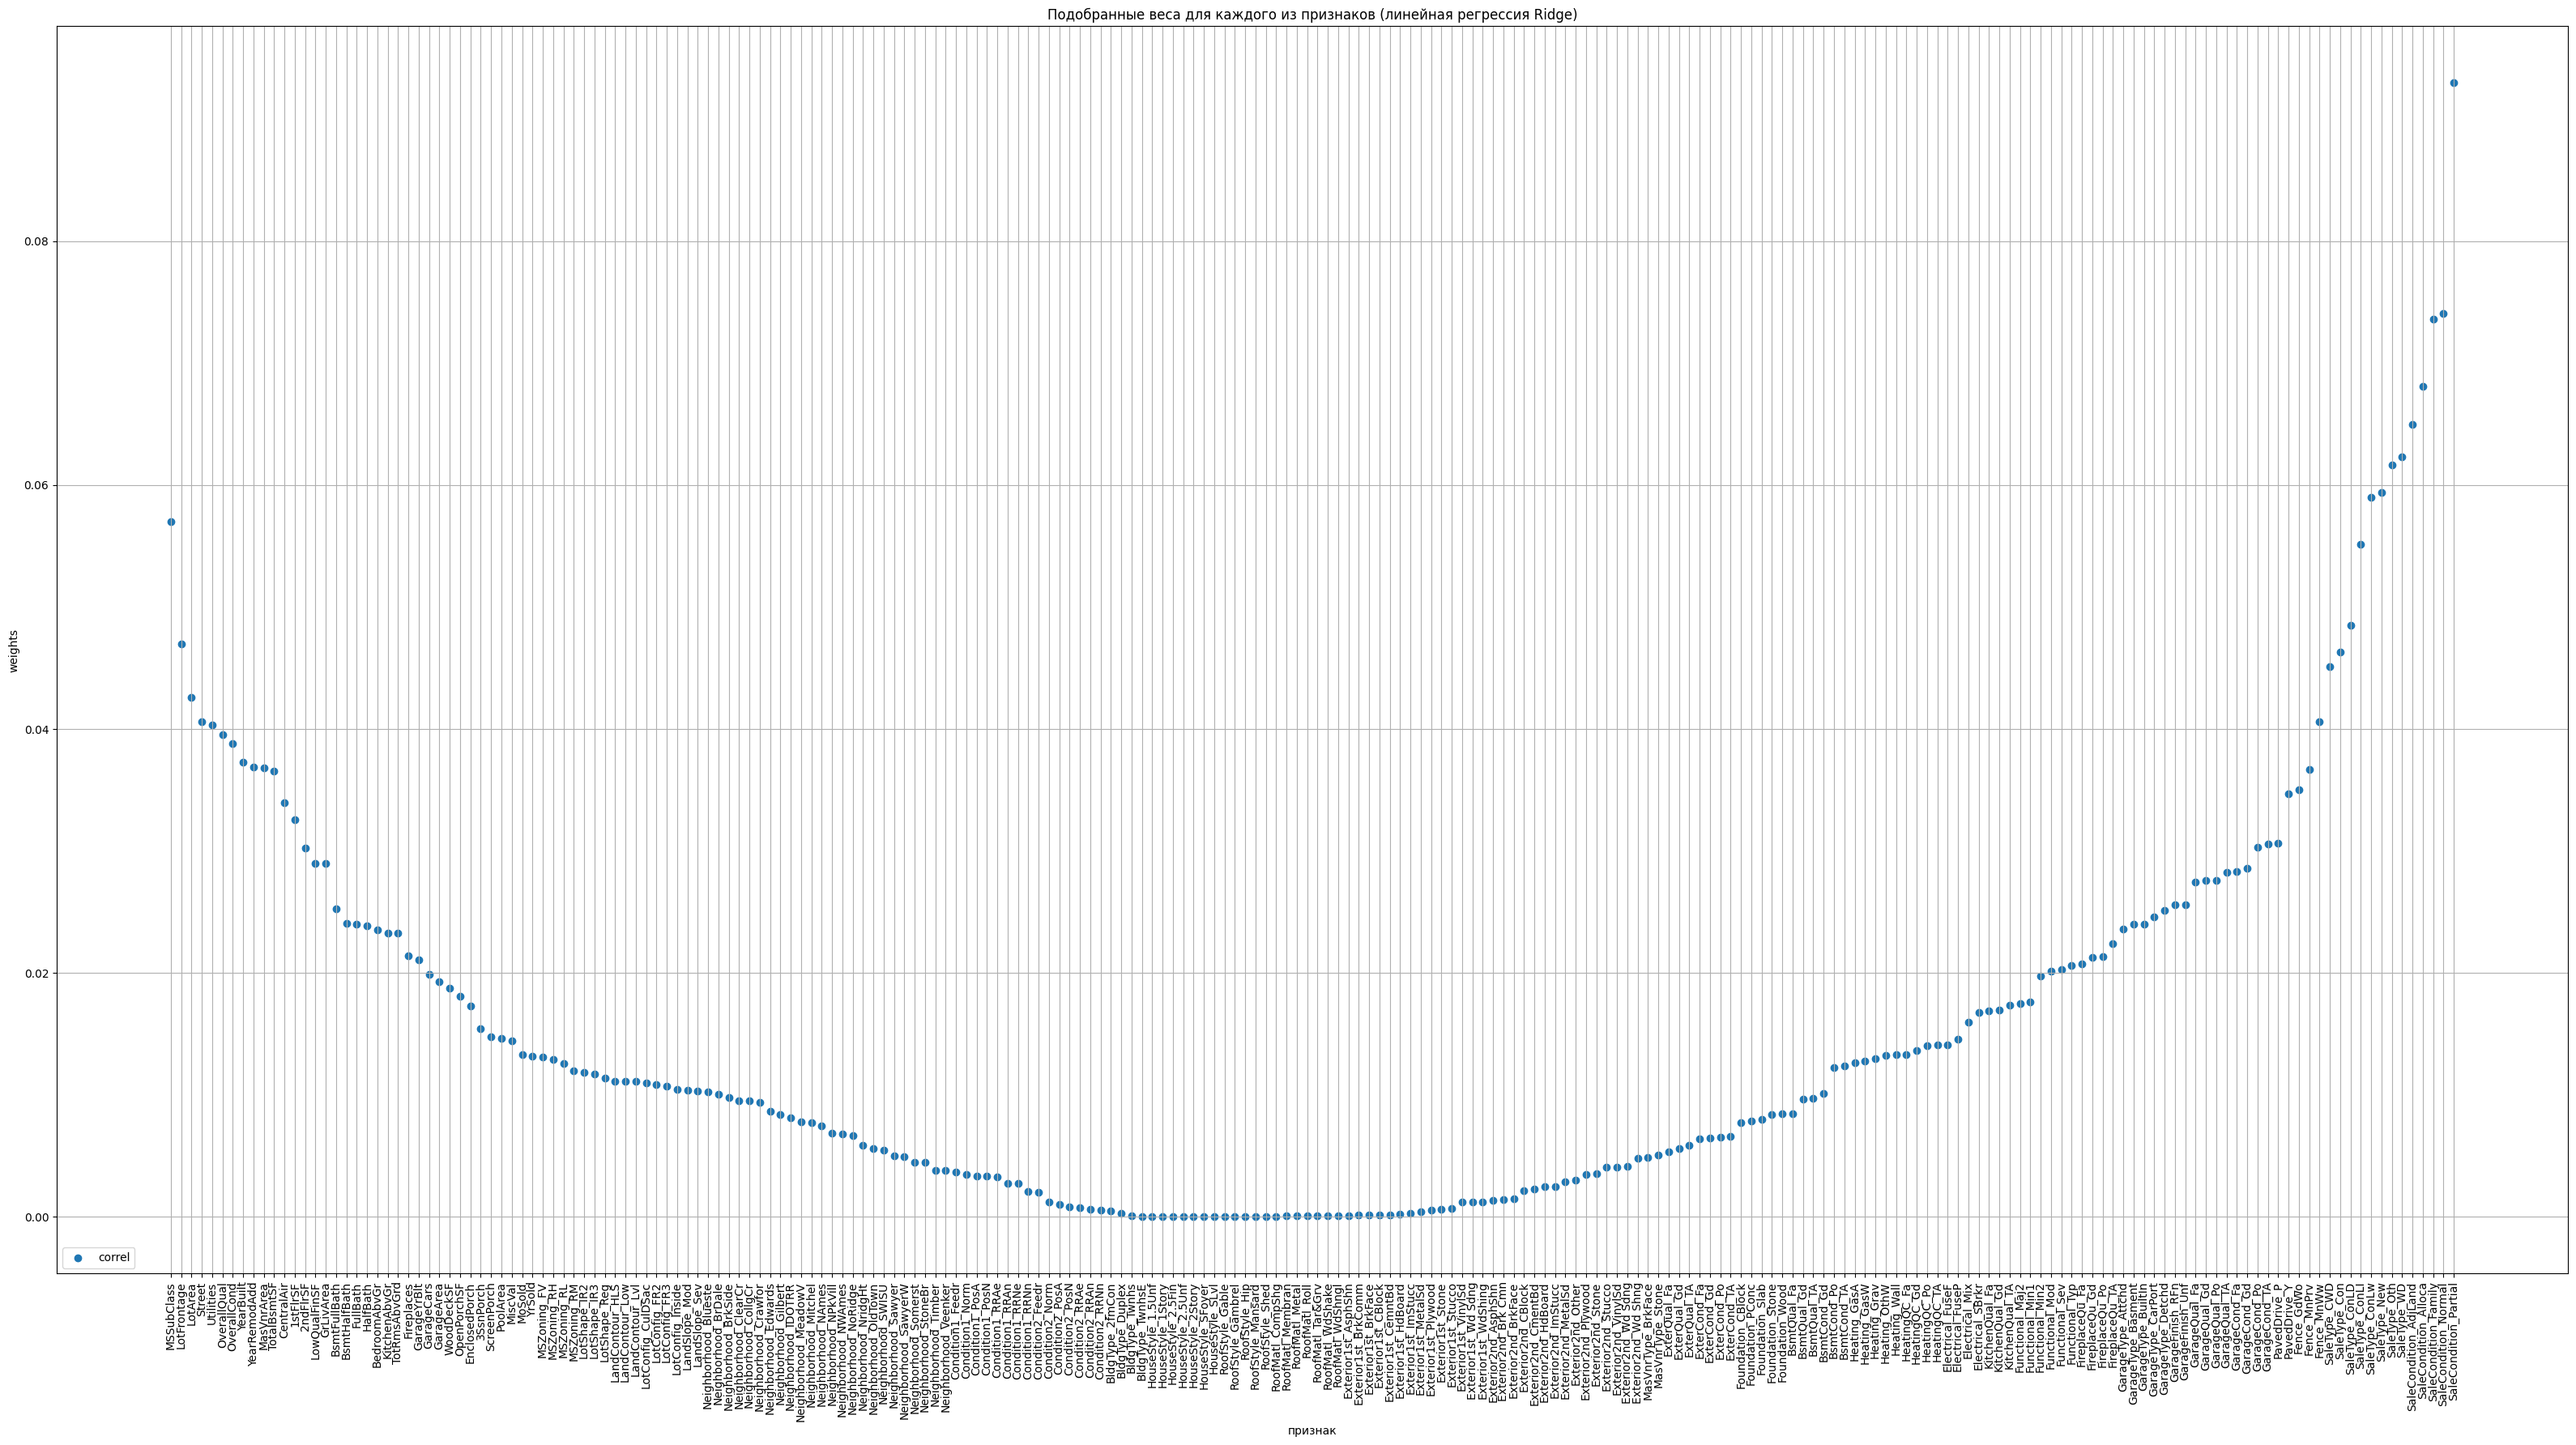

In [70]:
y1 = coef_ridge_cv["coef_ridge"].abs()
fig, ax = plt.subplots(figsize = (40,20))

x = X.columns

ax.scatter(x, y1, label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('weights')
plt.title('Подобранные веса для каждого из признаков (линейная регрессия Ridge)')

leg = ax.legend(loc='lower left', frameon=True)

In [71]:
print("lin_reg MSE test:  ", mean_squared_error(math.e**(y_test)-1, math.e**(lin_regr.predict(X_test))-1))
print("ridge cv MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(ridge_cv.predict(X_test))-1))
print("lasso cv MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(lasso_cv.predict(X_test))-1))

lin_reg MSE test:   15580835442.856325
ridge cv MSE test:  18727029875.396805
lasso cv MSE test:  20690206013.73317
